### Import necessary packages

In [7]:
import pandas as pd
import numpy as np
import tweepy
import requests
import json
import re

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')

# Gather Data

In [8]:
"""Read tweets from given csv-file into a dataframe"""

tweets = pd.read_csv('data/twitter-archive-enhanced.csv')
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
"""Download tweet image predictions file programmatically using the Requests library and read into a dataframe"""

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
r.headers['content-type']
pred_images = r.text

# write to a file "pred_images.tsv" - this step is not necessary, but I want to make a safety copy in my working folder
outfile = open('data/pred_images.tsv', 'w')
outfile.write(pred_images)
outfile.close()

# read saved tsv-file into a dataframe
pred_images = pd.read_csv('data/pred_images.tsv', sep="\t")
pred_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
""" Request tweet metadata from Twitter API with Tweety"""

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [11]:
"""Download metadata with JSON, write to txt-file line by line and read into dataframe"""

# storing stweet ids in list
tweet_ids = list(tweets['tweet_id'].astype(str))

# download metadata and write to file
exceptions = []
with open('data/tweet_json.txt', 'w', encoding = 'utf-8') as f:
    for id_tweet in tweet_ids: 
        try:
            tweet = api.get_status(id_tweet, tweet_mode= 'extended')
            json.dump(tweet._json, f)
            f.write("\n")
        except Exception as e:
            exceptions.append(id)
            print(str(e))

[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
Rate limit reached. Sleeping for: 734
[{'code': 144, 'message': 'No status found with that ID.'}]
Rate limit reached. Sleeping for: 735


In [12]:
# read txt-file with json-data into dataframe, keep only relevant columns
tweet_data = pd.read_json('data/tweet_json.txt', orient="records", lines=True)
tweet_data = tweet_data[['id', 'favorite_count', 'retweet_count']]
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2341 entries, 0 to 2340
Data columns (total 3 columns):
id                2341 non-null int64
favorite_count    2341 non-null int64
retweet_count     2341 non-null int64
dtypes: int64(3)
memory usage: 73.2 KB


# Assess Data

You can assess data for:
Quality: issues with content. Low quality data is also known as dirty data.
    
Tidiness: issues with structure that prevent easy analysis. Untidy data is also known as messy data. Tidy data requirements:
Each variable forms a column.
Each observation forms a row. 
Each type of observational unit forms a table.


Four main dimensions of data quality (dirty data) (in decreasing order - can help to guide the thought process):
	1. Completeness
	2. Validity (e.g. text in numeric field, duplicate entry in ID field, ...)
	3. Accuracy (wrong data that is valid)
	4. Inconsistency (e.g. abbreviation vs. full name)



### Dataframe: 'tweets'

In [13]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
tweets.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
901,758474966123810816,NaN,NaN,2016-07-28 01:31:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brandonald. He accidentally opened the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758474966...,11,10,Brandonald,None,None,None,None
2014,672222792075620352,NaN,NaN,2015-12-03 01:16:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cal. He's a Swedish Geriatric Cheddar....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672222792...,9,10,Cal,None,None,None,None
1925,674063288070742018,NaN,NaN,2015-12-08 03:09:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Earl. Earl is lost. Someone help Earl....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674063288...,5,10,Earl,None,None,None,None
2277,667437278097252352,NaN,NaN,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667437278...,10,10,None,None,None,None,None
1139,728015554473250816,NaN,NaN,2016-05-05 00:16:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rueben. He has reached ultimate pupper...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728015554...,11,10,Rueben,None,None,pupper,None
203,853299958564483072,NaN,NaN,2017-04-15 17:32:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rumpole. He'll be your Uber driver thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/853299958...,13,10,Rumpole,None,None,None,None
1060,741438259667034112,NaN,NaN,2016-06-11 01:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's still figuring out couche...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741438259...,9,10,Tucker,None,None,None,None
1339,704871453724954624,6.671522e+17,4.196984e+09,2016-03-02 03:30:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I found a forest Pipsy. 12/10 https://t.co/mIQ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704871453...,12,10,None,None,None,None,None
261,842846295480000512,NaN,NaN,2017-03-17 21:13:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He's wishing you a very fun a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842846295...,13,10,Charlie,None,None,None,None
513,811647686436880384,8.116272e+17,4.196984e+09,2016-12-21 19:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I've been informed that Augie was act...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None


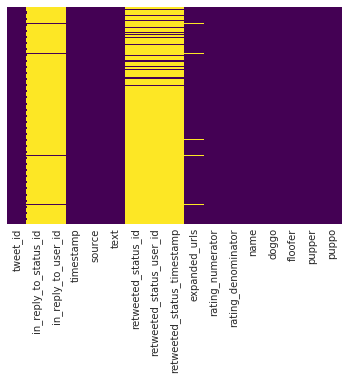

In [15]:
"""Check for NaN"""

sns.heatmap(tweets.isnull(),yticklabels=False,cbar=False,cmap='viridis')   # heatmap of NaNs

In [16]:
"""Look for suspicious numerators"""

tweets['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
"""Check suspicious denominators"""

tweets['text'][tweets['rating_denominator'] != 10]

313     @jonnysun @Lin_Manuel ok jomny I know you're e...
342              @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
784     RT @dog_rates: After so many requests, this is...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1598    Yes I do realize a rating of 4/20 would've bee...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someon

In [18]:
"""Check for suspicious dog names"""

tweets['name'].loc[(tweets['name'].str.islower())].value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
not              2
mad              2
actually         2
getting          2
space            1
infuriating      1
by               1
incredibly       1
my               1
light            1
old              1
his              1
this             1
all              1
officially       1
life             1
unacceptable     1
such             1
Name: name, dtype: int64

In [19]:
"""Check dog stages columns"""

for row in tweets.iterrows():
    tweets['stages'] = tweets['doggo']+tweets['floofer']+tweets['pupper']+tweets['puppo']

tweets['stages'].value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stages, dtype: int64

### Dataframe: 'tweet_data'

In [20]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2341 entries, 0 to 2340
Data columns (total 3 columns):
id                2341 non-null int64
favorite_count    2341 non-null int64
retweet_count     2341 non-null int64
dtypes: int64(3)
memory usage: 73.2 KB


In [21]:
tweet_data.sample(10)

,id,favorite_count,retweet_count
2147,669393256313184256,375,79
1237,710844581445812225,2684,740
638,792913359805018113,15545,4479
1867,674999807681908736,2331,1168
864,760656994973933572,7078,2110
462,816450570814898180,32918,9001
1702,680191257256136705,2269,550
1601,685198997565345792,2472,724
1765,677700003327029250,3564,1547
1169,718631497683582976,19939,8706


### df 'pred_images'

In [22]:
pred_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
pred_images.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1066,715696743237730304,https://pbs.twimg.com/media/Ce6qZC2WAAAcSoI.jpg,1,Staffordshire_bullterrier,0.427836,True,pug,0.221409,True,French_bulldog,0.132135,True
1564,793614319594401792,https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg,1,golden_retriever,0.705092,True,Labrador_retriever,0.219721,True,kuvasz,0.015965,True
1457,777684233540206592,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
1791,830583320585068544,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
1122,726935089318363137,https://pbs.twimg.com/media/ChaXmuAXEAE66KP.jpg,2,teddy,0.821615,False,toy_poodle,0.083749,True,Lakeland_terrier,0.033318,True
1372,762464539388485633,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,4,chow,0.999953,True,Tibetan_mastiff,0.000023,True,dhole,0.000003,False
844,695074328191332352,https://pbs.twimg.com/media/CaVmajOWYAA1uNG.jpg,1,Shih-Tzu,0.510106,True,Tibetan_terrier,0.071981,True,Lhasa,0.069231,True
388,673355879178194945,https://pbs.twimg.com/media/CVg9mTYWIAAu7J6.jpg,1,Rottweiler,0.529248,True,miniature_pinscher,0.168296,True,Appenzeller,0.100452,True
1539,790946055508652032,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1,dishwasher,0.700466,False,golden_retriever,0.245773,True,chow,0.039012,True
1080,718234618122661888,https://pbs.twimg.com/media/CfeukpmW4AEGjOE.jpg,1,malamute,0.370152,True,Siberian_husky,0.356398,True,Eskimo_dog,0.271042,True


In [24]:
pred_ids = set(pred_images['tweet_id'])
tweets_ids = set(tweets['tweet_id'])

print("tweets without image prediction: {}".format(len(tweets_ids - pred_ids)))

tweets without image prediction: 281


## Issues

#### df tweets
quality:
- Completeness / Validity: 78 of tweets are in_reply (col 1 != NaN), 181 are retweets (col 6 != NaN). These have to be deleted, we want originals only.
- Completeness: Cols 1,2,6,7,8 can then be deleted in next step as we don't need them for the analysis
- Completeness: 59 URLS missing, these could be interfered, but as column is not needed for analysis it will be dropped
- Validity: Column datatypes have to be changed: 0 to object, 3 to datetime, last 4 to category
- Validity: 'None' values have to be changed to NaN (columns stages and names)
- Validity: 23 denominators != 10
- Validity: some suspicious numerators (>>15)
- Accuracy: Dog Names not always correct (examples:'the', 'a', 'None')
- Accuracy: Dog stages often missing, some dogs with more than 1 stage
    
tydiness:
- merge four last columns with dog stages to one
- merge df with tweet_data
- merge with columns jpg-url and p1 from pred_images - delete tweets without pictures

    
#### df tweet_data
quality:
- Validity: Datatype col 0 must be changed to object

tidyness:
- Whole df has to be merged with df tweets on column tweet_id (col name has to be changed for that)

#### df pred_images
quality:
- Validity: Datatyp col 0 must be changed to object

tidyness:
- merge columns jpg-url and p1 with tweets (that's all we need for our analysis)

# Clean Data

### Copy DataFrames

## Merge DataFrames

Please note: this step is done at the beginning of the cleaning because the set is small and it allows us to drop some columns right at the beginning. This will make cleaning easier afterwards. Also we will only merge data necessary for the analysis

In [44]:
"""Merge tw_master and tw_data, append 2 necessary columns from pred_images"""

tw_data = tw_data.rename(columns={'id': 'tweet_id'})
tw_master = pd.merge(tw_master, tw_data, on='tweet_id', how='left')
tw_master = pd.merge(tw_master, tw_predictions[['tweet_id', 'jpg_url', 'p1']], how='left')
tw_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
stages                        23

### Clean 

In [45]:
"""DEFINE: Remove retweets / replys & tweets without image prediction"""

# CODE: 
display(len(tw_master)) # for reference
tw_master = tw_master[tw_master['in_reply_to_status_id'].isnull()]
tw_master = tw_master[tw_master['retweeted_status_id'].isnull()]
tw_master = tw_master[tw_master['p1'].notnull()]

2356

In [46]:
# TEST:
len(tw_master)

1971

In [47]:
"""DEFINE: Drop empty columns"""

# CODE:
tw_master.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
               'retweeted_status_timestamp', 'doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [48]:
# TEST:
tw_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
stages                1971 non-null object
favorite_count        1970 non-null float64
retweet_count         1970 non-null float64
jpg_url               1971 non-null object
p1                    1971 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 215.6+ KB


In [49]:
"""DEFINE: Clean strings in 'stages' from 'None' and set empty strings to np.NaN"""

# CODE:
tw_master['stages'] =tw_master['stages'].str.replace('None','')
tw_master['stages'].replace('', np.NaN, inplace=True)

In [50]:
# TEST:
tw_master['stages'].value_counts()

pupper          201
doggo            63
puppo            22
doggopupper       8
floofer           7
doggofloofer      1
doggopuppo        1
Name: stages, dtype: int64

In [51]:
"""DEFINE: Setting double entries to string 'multiple'."""

# CODE:
tw_master.loc[(tw_master['stages'].str.len() > 7), 'stages'] = "multiple"

In [52]:
# TEST:
tw_master['stages'].value_counts()

pupper      201
doggo        63
puppo        22
multiple     10
floofer       7
Name: stages, dtype: int64

In [53]:
"""DEFINE: Fix datatypes: - id to object, timestamp to datetime, stages to category"""

# CODE:
tw_master['tweet_id'] = tw_master['tweet_id'].astype(str)
tw_master['stages'] = tw_master['stages'].astype('category')
tw_master['timestamp'] = pd.to_datetime(tw_master['timestamp'], format='%Y-%m-%d')

In [43]:
"""Make copies of the original dataframes"""

tw_master = tweets.copy()
tw_predictions = pred_images.copy()
tw_data = tweet_data.copy()

# store safety copies on server
tw_master.to_csv('data/safety_master.csv')
tw_predictions.to_csv('data/safety_predictions.csv')
tw_data.to_csv('data/safety_data.csv')

In [54]:
# TEST:
tw_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
stages                303 non-null category
favorite_count        1970 non-null float64
retweet_count         1970 non-null float64
jpg_url               1971 non-null object
p1                    1971 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 202.3+ KB


In [55]:
"""DEFINE: Eliminate wrong dog names (lowercase) and also set string 'None' to np.nan"""

# look at data (sample)
pd.set_option('max_colwidth', 800)
tw_master[['text', 'name']][tw_master['name'] == 'a'].sample(10)

,text,name
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,a
2314,This is a golden Buckminsterfullerene named Johm. Drives trucks. Lumberjack (?). Enjoys wall. 8/10 would hug softly https://t.co/uQbZJM2DQB,a
2354,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,a
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,a
1994,This is a baby Rand Paul. Curls for days. 11/10 would cuddle the hell out of https://t.co/xHXNaPAYRe,a
1049,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,a
2273,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,a
2304,This is a curly Ticonderoga named Pepe. No feet. Loves to jet ski. 11/10 would hug until forever https://t.co/cyDfaK8NBc,a
2125,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,a
1737,Guys this really needs to stop. We've been over this way too many times. This is a giraffe. We only rate dogs.. 7/10 https://t.co/yavgkHYPOC,a


In [56]:
# CODE:
tw_master.loc[(tw_master['name'].str.islower()), 'name'] = np.nan
tw_master.loc[(tw_master['name'] == 'None'), 'name'] = np.nan

In [57]:
# TEST:
tw_master['name'].value_counts().head()

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Penny       9
Name: name, dtype: int64

In [58]:
"""DEFINE: Reassign names to rows with name = np.nan and words 'named' or 'name is' in text"""

# CODE:
# extract text from text column for rows that meet these conditions and store them into lists
named = tw_master.loc[(tw_master['name'].isnull() & tw_master['text'].str.contains('named')), ['text']]['text'].tolist()
name_is = tw_master.loc[(tw_master['name'].isnull() & tw_master['text'].str.contains('name is')), ['text']]['text'].tolist()

print(len(named))
print(len(name_is)) 

23
6


In [59]:
# iterate through 'named' list and set value of column 'name' to be the word that follows after 'named' in the text
for text in named:
    mask = tw_master['text'] == text
    tw_master.loc[mask, 'name'] = re.findall(r"named\s(\w+)", text)
    print(tw_master.loc[mask, 'name'])
    
# iterate through 'name_is' list and set value of column 'name' to be the word that follows after 'named' in the text
for text in name_is:
    mask = tw_master['text'] == text
    tw_master.loc[mask, 'name'] = re.findall(r"name is\s(\w+)", text)
    print(tw_master.loc[mask, 'name'])

1853    Wylie
Name: name, dtype: object
1955    Kip
Name: name, dtype: object
2034    Jacob
Name: name, dtype: object
2066    Rufus
Name: name, dtype: object
2116    Spork
Name: name, dtype: object
2125    Cherokee
Name: name, dtype: object
2128    Hemry
Name: name, dtype: object
2146    Alphred
Name: name, dtype: object
2161    Alfredo
Name: name, dtype: object
2166    Zeus
Name: name, dtype: object
2191    Leroi
Name: name, dtype: object
2204    Berta
Name: name, dtype: object
2218    Chuk
Name: name, dtype: object
2227    Guss
Name: name, dtype: object
2235    Alfonso
Name: name, dtype: object
2249    Cheryl
Name: name, dtype: object
2255    Jessiga
Name: name, dtype: object
2264    Klint
Name: name, dtype: object
2269    Tickles
Name: name, dtype: object
2273    Kohl
Name: name, dtype: object
2304    Pepe
Name: name, dtype: object
2311    Octaviath
Name: name, dtype: object
2314    Johm
Name: name, dtype: object
168    Zoey
Name: name, dtype: object
852    Zoey
Name: name, dtype: o

In [60]:
# TEST:
tw_master['name'].value_counts().head(20)

Charlie    11
Lucy       10
Cooper     10
Oliver     10
Penny       9
Tucker      9
Sadie       8
Winston     8
Daisy       7
Toby        7
Lola        7
Bella       6
Koda        6
Stanley     6
Bo          6
Jax         6
Oscar       5
Buddy       5
Dave        5
Scout       5
Name: name, dtype: int64

In [61]:
"""DEFINE: Fix suspicious denominators (and their respective numerators)"""

# look at data
tw_master.loc[(tw_master['rating_denominator'] != 10), ['text', 'rating_denominator']]

,text,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50


In [62]:
"""DEFINE: Divide numerators and denominators for multiple dogs by number of respective dogs"""

# CODE:
tw_master['rating_numerator'] = np.where((tw_master['rating_denominator'] > 10) & (tw_master['rating_denominator'] %10 == 0), 
                                           (tw_master['rating_numerator'] / (tw_master['rating_denominator']/10)), 
                                           tw_master['rating_numerator'])
tw_master['rating_denominator'] = np.where((tw_master['rating_denominator'] > 10) & (tw_master['rating_denominator'] %10 == 0), 
                                           tw_master['rating_denominator'] / (tw_master['rating_denominator']/10), 
                                           tw_master['rating_denominator'])

In [63]:
# TEST:
display(tw_master['rating_denominator'].sort_values(ascending=False).head())
display(tw_master['rating_numerator'].sort_values(ascending=False).head())

1068    11.0
1662    11.0
2355    10.0
906     10.0
891     10.0
Name: rating_denominator, dtype: float64

979     1776.0
2074     420.0
695       75.0
763       27.0
1712      26.0
Name: rating_numerator, dtype: float64

In [64]:
"""DEFINE: Manually clean remaining wrong denominators (and corresponding numerators)"""

# look at data
display(tw_master.loc[(tw_master['rating_denominator'] != 10), ['text', 'rating_denominator']])

,text,rating_denominator
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7.0
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11.0
1662,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,11.0
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,2.0


In [65]:
# CODE
tw_master.drop(516, axis=0, inplace=True)  # this observation has no rating, so we don't want to keep it
tw_master.loc[1068, 'rating_denominator'] = 10
tw_master.loc[1068, 'rating_numerator'] = 14
tw_master.loc[1662, 'rating_denominator'] = 10
tw_master.loc[1662, 'rating_numerator'] = 10
tw_master.loc[2335, 'rating_denominator'] = 10
tw_master.loc[2335, 'rating_numerator'] = 9

In [66]:
# TEST:
tw_master.loc[(tw_master['rating_denominator'] != 10), ['text', 'rating_denominator']]

,text,rating_denominator


In [72]:
"""DEFINE: Extract decimal ratings using a regular expression and round them to integers (to have standardized data)"""

# look at data
tw_master.loc[(tw_master['text'].str.contains(r"(\d+\.\d*\/\d+)")), ['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0


In [73]:
# CODE:
tw_master.loc[45, 'rating_numerator'] = 14  # rounded to next int
tw_master.loc[695, 'rating_numerator'] = 10  # rounded to next int
tw_master.loc[763, 'rating_numerator'] = 11 # rounded to next int
tw_master.loc[1712, 'rating_numerator'] = 11 # rounded to next int

In [74]:
# TEST:
tw_master['rating_numerator'].sort_values(ascending=False).head()

979     1776.0
2074     420.0
214       14.0
347       14.0
436       14.0
Name: rating_numerator, dtype: float64

In [77]:
"""DEFINE: Manually normalize the remaining oultiers (to have standardized data for the analysis)"""
 
# look at data
tw_master.loc[(tw_master['rating_numerator'] > 14), ['text', 'rating_numerator']]


,text,rating_numerator
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0
2074,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420.0


In [78]:
# CODE: 
tw_master.loc[979, 'rating_numerator'] = 14 # outlier - set to 'normal' max value
tw_master.loc[2074, 'rating_numerator'] = 14 # outlier - set to 'normal' max value

In [82]:
# TEST:
display(tw_master['rating_numerator'].max())

14.0

## Store Data

In [83]:
tw_master.to_csv('data/twitter_archive_master.csv', index=False)
tw_predictions.to_csv('data/twitter_predictions.csv', index=False)  # file with additional data, not needed for analysis

# Analyze Data

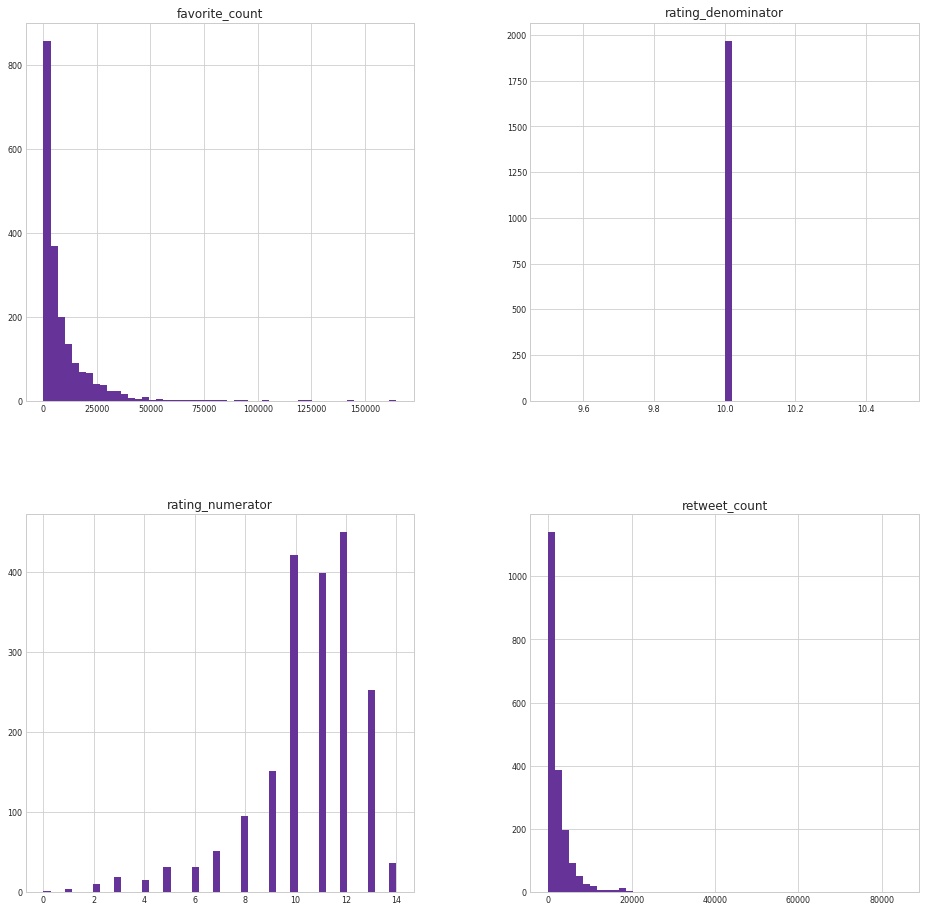

In [84]:
"""Print histograms of numerical features"""

def histDF(df, figsize=(16, 16), bins=50, color='rebeccapurple'):
    """Plots histograms for all numerical columns in DataFrame.
    Params
        ======
            df: DataFrame
            figsize: default is (16, 16)
            bins: default is 50
            color: default is 'rebeccapurple'
    """
    df_num = df.select_dtypes(include = ['float64', 'int64'])
    df_num.hist(figsize=figsize, bins=bins, xlabelsize=8, ylabelsize=8, color=color);
    return df_num

histDF(tw_master);

Insights:
- most favourite counts < 25'000, further cleaning of outliers would help
- rating denominator was well cleaned and could be dropped as column
- most dogs are rated between 10-12
- retweet count - same issues as with favourite counts

In [85]:
top_breeds = tw_master['p1'].value_counts().head(10)
top_breeds

golden_retriever      136
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
chow                   41
Samoyed                40
Pomeranian             38
toy_poodle             37
malamute               29
Name: p1, dtype: int64

In [86]:
for breed in top_breeds.keys():
    print(breed + ", average rating score: " + str(tw_master.loc[tw_master['p1'] == breed]['rating_numerator'].mean()))

golden_retriever, average rating score: 11.6470588235
Labrador_retriever, average rating score: 11.1276595745
Pembroke, average rating score: 11.4431818182
Chihuahua, average rating score: 10.6923076923
pug, average rating score: 10.2407407407
chow, average rating score: 11.6097560976
Samoyed, average rating score: 11.7
Pomeranian, average rating score: 11.1578947368
toy_poodle, average rating score: 11.0540540541
malamute, average rating score: 10.8965517241
